In [1]:
import numpy as np
import pandas as pd
#import dask.bag as db
import dask.dataframe as dd
from plotnine import *
import seaborn as sns

In [2]:
# read file
with open("countries.txt", mode="r", encoding="utf-8") as f:
    content = f.readlines()
content = [x.strip() for x in content] 
# create table with the countries
countries=[]
for line in content:
    words=line.split('|')
    country=[]
    for word in words:
        country.append(word)
    countries.append(country)
# US states
states=[' AL',' AK',' AZ',' AR',' CA',' CO',' CT',' DE',' FL',' GA',' HI', \
        ' ID',' IL',' IN',' IA',' KS',' KY',' LA',' ME',' MD',' MA',' MI', \
        ' MN',' MS',' MO',' MT',' NE',' NV',' NH',' NJ',' NM',' NY',' NC', \
        ' ND',' OH',' OK',' OR',' PA',' RI',' SC',' SD',' TN',' TX',' UT', \
        ' VT',' VA',' WA',' WV',' WI',' WY',' DC']

In [3]:
def find_which_country(countries, location):
    if isinstance(location, str):
        for index, country in enumerate(countries):
            for word in country:
                if word in location:
                    return countries[index][0]
        # check for US states
        for state in states:
            if state in location:
                return 'United States'
    return 'Others'

In [4]:
df = dd.read_csv('Users.csv',usecols=[4])

In [5]:
df['Country']=df.apply(lambda row: find_which_country(countries, row['Location']), axis=1)
df_group=df.groupby(df['Country']).count().compute()

df_group.info()

C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\core.py:3000: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  warnings.warn(msg)


<class 'pandas.core.frame.DataFrame'>
Index: 218 entries, Afghanistan to Saint Helena
Data columns (total 1 columns):
Location    218 non-null int64
dtypes: int64(1)
memory usage: 3.4+ KB


In [6]:
pd.set_option('display.max_rows', 500)
df_group

,Location
Country,
Afghanistan,819
Albania,1247
Algeria,4293
American Samoa,7
Andorra,54
Angola,219
Anguilla,6
Antarctica,220
Argentina,11850


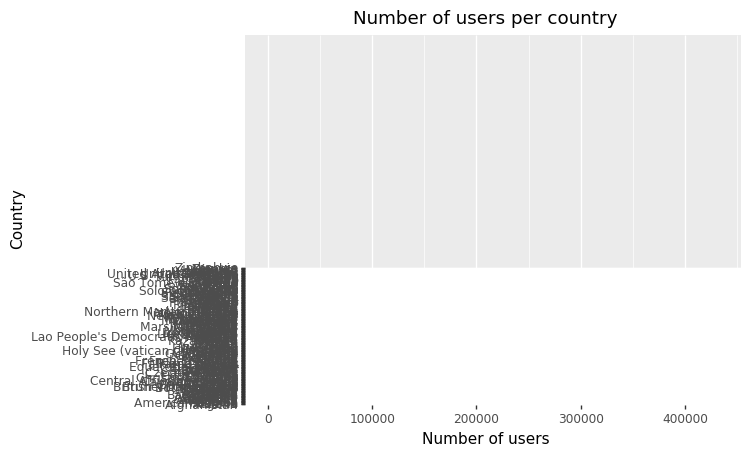

<ggplot: (157627596692)>

In [7]:
plot = ggplot(df_group, aes(y=df_group.index, x='Location'))
plot += geom_col()
plot += ggtitle("Number of users per country")
plot += xlab("Number of users")
plot += ylab("Country")
#plot += coord_flip()
plot

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

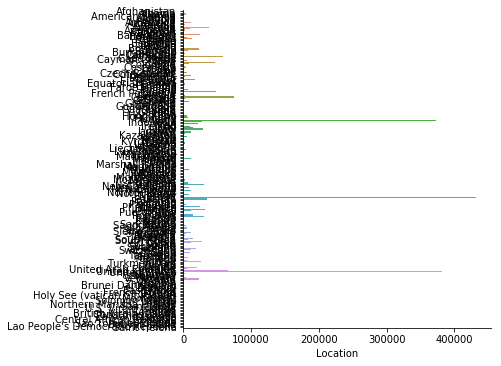

In [8]:
sns.catplot(y=df_group.index, x='Location', kind="bar", data=df_group);